In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from google.colab import files
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.metrics import precision_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import time
from sklearn.model_selection import StratifiedKFold

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
uploaded = files.upload()
#download capstone_train.csv from kaggle, so we can import them locally. Its plants data with 13 columns
#Heigh_From_Sea_Level, Aspect, Slope, Distance_To_Water_Source, Standing_Distance_To_Water_Source, Distance_To_Road, Shadow_In_Morning, 
#Shadow_In_Midday, Shadow_In_Evening, Distance_To_Fire, Turf, Neighbourhood_Type, Plant_Type

Saving capstone_train.csv to capstone_train.csv


In [ ]:
data = pd.read_csv('capstone_train.csv')
# Copying dataframe for key insights
data1 = data

In [ ]:
#Exploratory Data Analysis

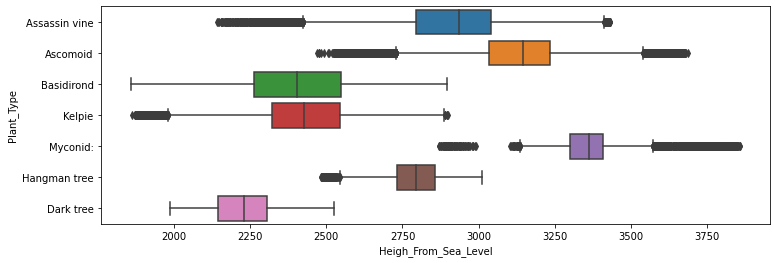

As we can see from the boxplot outliers are present but the varition of values are distinguishable
and hence very useful in training the dataset


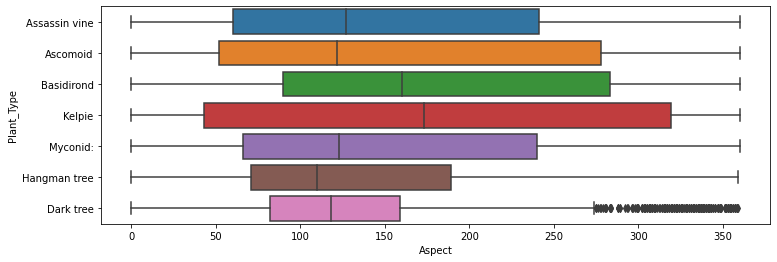

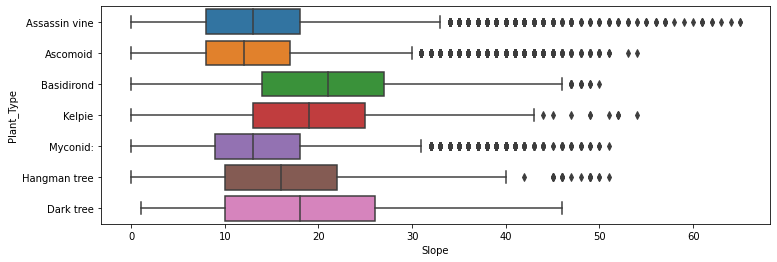

Slope and Aspect Values are very closely put which would not help with improving the performance of the classifier


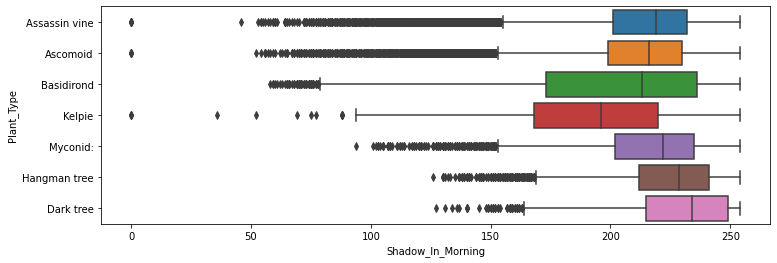

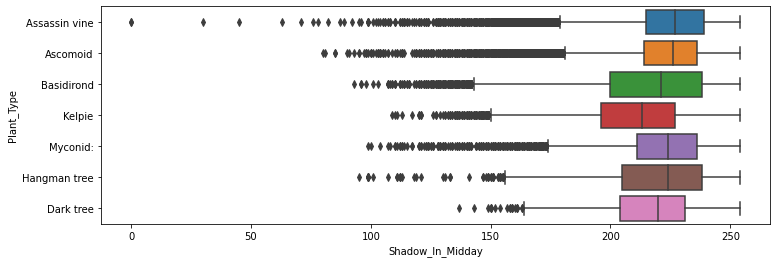

At first it seems like the data would make use of the shadow for example a plant in the morning might face the sun and as the day goes on
it might follow the sun or it might steer away from the sun, but in each condition the shadow might be effected. In this situation choosing these columns
will add redundant data as this these columns have few diparity between them and it's better to have the classifier to have a higher bias over other columns in classification 


<Figure size 864x288 with 0 Axes>

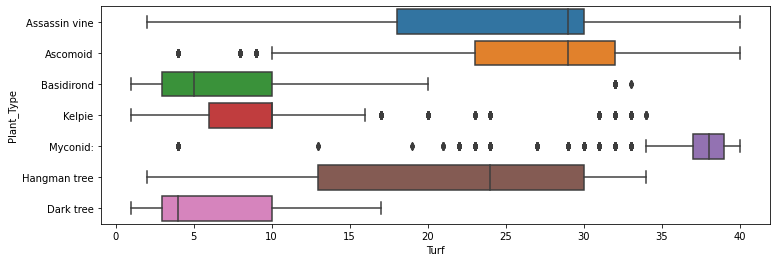

Turf is also a very important column for the classifier


In [ ]:
plt.figure(figsize=(12,4))
sns.boxplot(x = 'Heigh_From_Sea_Level',y = 'Plant_Type', data=data)
plt.show()
print("""As we can see from the boxplot outliers are present but the varition of values are distinguishable
and hence very useful in training the dataset""")
plt.figure(figsize=(12,4))
sns.boxplot(x = 'Aspect',y = 'Plant_Type', data=data)
plt.show()
plt.figure(figsize=(12,4))
sns.boxplot(x = 'Slope',y = 'Plant_Type', data=data)
plt.show()
print("""Slope and Aspect Values are very closely put which would not help with improving the performance of the classifier""")
plt.figure(figsize=(12,4))
sns.boxplot(x = 'Shadow_In_Morning',y = 'Plant_Type', data=data)
plt.show()
plt.figure(figsize=(12,4))
sns.boxplot(x = 'Shadow_In_Midday',y = 'Plant_Type', data=data)
plt.show()
plt.figure(figsize=(12,4))
print("""At first it seems like the data would make use of the shadow for example a plant in the morning might face the sun and as the day goes on
it might follow the sun or it might steer away from the sun, but in each condition the shadow might be effected. In this situation choosing these columns
will add redundant data as this these columns have few diparity between them and it's better to have the classifier to have a higher bias over other columns in classification """)
plt.figure(figsize=(12,4))
sns.boxplot(x = 'Turf',y = 'Plant_Type', data=data)
plt.show()
print("Turf is also a very important column for the classifier")

In [ ]:
#removing columns which does not affect data classification
data.drop('Aspect', axis=1, inplace=True)
data.drop('Slope', axis=1, inplace=True)
data.drop('Shadow_In_Morning', axis=1, inplace=True)
data.drop('Shadow_In_Midday', axis=1, inplace=True)
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
#Data Preprocessing and handling outliers 

In [ ]:
#substituting all missing values with mean values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:,:])
x[:,:] = imputer.transform(x[:,:])

In [ ]:
#removing outliers above z score of 3
z = np.abs(stats.zscore(x))
print(z)
x = x[(z < 3).all(axis=1)]
y = y[(z < 3).all(axis=1)]

[[0.08762888 0.16614305 0.26801787 ... 0.58140273 0.48840544 1.04949131]
 [0.21987495 1.69816543 5.59074247 ... 0.34820659 1.19955476 0.83543396]
 [1.42081221 1.64167124 1.79615493 ... 0.0863767  0.80489798 0.83543396]
 ...
 [0.69882016 0.20577708 0.07538372 ... 0.9994251  0.48840544 1.04949131]
 [0.52356241 0.32150209 0.41878531 ... 0.12867092 0.1719129  0.83543396]
 [0.66295691 0.94490948 0.14406404 ... 0.9005394  1.19955476 0.83543396]]


In [ ]:
print("dependent values number is equal to ",y.shape)
print("independent values number is equal to ",x.shape)

dependent values number is equal to  (437733,)
independent values number is equal to  (437733, 8)


In [ ]:
#Test train split 80 20
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state = 0)

In [ ]:
#Classification Model Predictions

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
knnclassifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 1,n_jobs = -1)
knnclassifier.fit(xtrain,ytrain)
end = time.time()
train = end-start


In [ ]:
#n_neighbors gives the number of neighbors to choose from, where the default is set to 5.
#P values 1 and 2 states Manhattan and Euclidean Distances Respectively. 
#n_jobs just makes use of all the processors and useful for large amount of dataset.
#I ran a grid search algorithm for the parameters to find the optimal values.


In [ ]:
start = time.time()
knny_pred = knnclassifier.predict(xtest)
end = time.time()
test = end-start


In [ ]:
#Precision: True positives/True positives + False Positives. 
#Using the confusion matrix for correct class predictions for each class and
#then average precision for all the classes gives the precision. It gives the percentage
#of results that are useful or relevant.
#Recall: True Positives/ True Positives + False Negatives. Also calculated from the confusion 
#matrix gives the percentage of total results classified by model correctly.

In [ ]:
#Performance metrics of Knn
#knncm = confusion_matrix(ytest,knny_pred)
#print(knncm)
#multilabel_confusion_matrix(ytest, y_pred,labels=["Ascomoid", "Assassin vine", "Basidirond","Dark tree","Hangman tree","Kelpie","Myconid"])
score = knnclassifier.score(xtest, ytest)
print("")
print("the score of Knn classifier is ",score*100)
knnprecision = precision_score(ytest, knny_pred, average='macro')
print("the precision score of using Knn is ",knnprecision)
knn_recall = recall_score(ytest, knny_pred, average='macro')
print("the recall for knn is ",knn_recall)
knn_accuracy = accuracy_score(ytest, knny_pred)
print("the accuracy of Knn is ",knn_accuracy)
knn_f1_score = f1_score(ytest, knny_pred, average='macro')
print("the f1 score is ",knn_f1_score)
print("train time = ",train,"test time = ",test)
#Storing values for comparision
knna = knn_accuracy
knnf = knn_f1_score
knntr = train
knnte = test


the score of Knn classifier is  96.33568254766011
the precision score of using Knn is  0.9395598418464616
the recall for knn is  0.9213463615857626
the accuracy of Knn is  0.9633568254766012
the f1 score is  0.9300047157527098
train time =  1.2060887813568115 test time =  3.2413177490234375


In [ ]:
#k-fold cross validation for Knn classifier
accuracies = cross_val_score(estimator = knnclassifier, X = xtrain, y = ytrain, cv = 10, n_jobs = -1)
accuracies.mean()

0.9610349948634151

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'algorithm':['auto'],'metric':['minkowski'],'n_neighbors':[3,5],'p':[1]}]#tried varius values for p neighbours, removed them to decrease running time
grid_search = GridSearchCV(estimator= knnclassifier,param_grid=parameters,scoring='accuracy',cv = 10,n_jobs=-1)
grid_search = grid_search.fit(xtrain,ytrain)
best_accuracy = grid_search.best_score_
print(best_accuracy)
best_parameters = grid_search.best_params_
print(best_parameters)

0.9610349948634151
{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 3, 'p': 1}


In [ ]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
start = time.time()
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state=0,splitter = 'best',max_features=7)
classifier.fit(xtrain,ytrain)
end = time.time()
train = end-start


In [ ]:
#Criterion is defaulted to ‘gini’ gives the measure of quality of split. 
#random state keeps the classifier at the same classification so with each time we
#run with the same parameters we get the same values and useful for testing various parameters
#selections for a model and max features are useful for finding the best split.

In [ ]:
start = time.time()
y_pred = classifier.predict(xtest)
end = time.time()
test = end-start

In [ ]:
#performance metrics of Decision Tree classifier 
score = classifier.score(xtest, ytest)
#cm = confusion_matrix(ytest,y_pred)
print("Decision tree classifier")
print("the score of decision tree classifier is ",score*100)
decprecision = precision_score(ytest, y_pred, average='macro')
print("the precision score of using decision tree is ",decprecision)
dec_recall = recall_score(ytest, y_pred, average='macro')
print("the recall for decision tree is ",dec_recall)
decaccuracy = accuracy_score(ytest, y_pred)
print("the accuracy of Decision Trees are ",decaccuracy)
dec_f1_score = f1_score(ytest, y_pred, average='macro')
print("the f1 score is ",dec_f1_score)
print("train time = ",train,"test time = ",test)
dta = decaccuracy
df = dec_f1_score
dtr = train
dte = test

Decision tree classifier
the score of decision tree classifier is  94.22710087153186
the precision score of using decision tree is  0.9007673028393643
the recall for decision tree is  0.892186203562603
the accuracy of Decision Trees are  0.9422710087153187
the f1 score is  0.8964065992469274
train time =  3.5745506286621094 test time =  0.028425216674804688


In [ ]:
#k-fold cross validation for decision tree
accuracies = cross_val_score(estimator = classifier, X = xtrain, y = ytrain, cv = 10, n_jobs = -1)
accuracies.mean()

0.9381700071727093

In [ ]:
#Random forest classifier 
from sklearn.ensemble import RandomForestClassifier
start = time.time()
randclassifier = RandomForestClassifier(n_estimators = 30,random_state=0,verbose=0,criterion='entropy',max_features=5)
randclassifier.fit(xtrain,ytrain)
end = time.time()
train = end-start

In [ ]:
start = time.time()
randy_pred = randclassifier.predict(xtest)
end = time.time()
test = end-start

In [ ]:
#performance metrics of Random forest classifier 
score = randclassifier.score(xtest, ytest)
#cm = confusion_matrix(ytest,y_pred)
print("Random forest")
print("the score of Random forest classifier is ",score*100)
randprecision = precision_score(ytest, randy_pred, average='macro')
print("the precision score of using Random forest is ",randprecision)
rand_recall = recall_score(ytest, randy_pred, average='macro')
print("the recall for Random forest is ",rand_recall)
randaccuracy = accuracy_score(ytest,randy_pred)
print("the accuracy is equal to ",randaccuracy)
rand_f1_score = f1_score(ytest, randy_pred, average='macro')
print("the f1 score is ",rand_f1_score)
print("train time = ",train,"test time = ",test)
rfa = randaccuracy
rff = rand_f1_score
rftr = train
rfte = test

Random forest
the score of Random forest classifier is  96.66579094657727
the precision score of using Random forest is  0.9526001199442515
the recall for Random forest is  0.9220873189994138
the accuracy is equal to  0.9666579094657727
the f1 score is  0.9365954409764417
train time =  50.288947343826294 test time =  0.6952335834503174


In [ ]:
#changed n_estimators to 10 to get the max_features value faster then changed back the n_estimators to 30 and so with the max features
parameters = [{'n_estimators':[10],'random_state':[0],'criterion':['entropy'],'max_features':[1,5]}]
grid_search = GridSearchCV(estimator= randclassifier,param_grid=parameters,scoring='accuracy',cv = 10,n_jobs=-1)
grid_search = grid_search.fit(xtrain,ytrain)
best_accuracy = grid_search.best_score_
print(best_accuracy)
best_parameters = grid_search.best_params_
print(best_parameters)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.9599184496453873
{'criterion': 'entropy', 'max_features': 5, 'n_estimators': 10, 'random_state': 0}


In [ ]:
#Comparison of model using performance KPIs, Training & Testing Time

In [ ]:
#F1 Score: 2 * (precision*recall) / (precision+recall), 
#and the main use for this KPI is test accuracy or rather in a realistic
#situation giving the performance using F1 score.
#Accuracy: It is used to calculate correct by total predictions.
#Just telling us how well the model performed for the given dataset

In [ ]:
print("Different Models Comparisions")
print("Classifier","\t"*4,"Accuracy","\t"*4,"F1 score","\t"*4,"Train time","\t"*4,"Testtime")
print("KNN ","\t"*5,knna,"\t"*3,knnf,"\t"*3,knntr,"\t"*3,knnte)
print("Decision Tree ","\t"*4,dta,"\t"*3,df,"\t"*3,dtr,"\t"*3,dte)
print("Random Forest ","\t"*4,rfa,"\t"*3,rff,"\t"*3,rftr,"\t"*3,rfte)

Different Models Comparisions
Classifier 				 Accuracy 				 F1 score 				 Train time 				 Testtime
KNN  					 0.9633568254766012 			 0.9300047157527098 			 1.2060887813568115 			 3.2413177490234375
Decision Tree  				 0.9422710087153187 			 0.8964065992469274 			 3.5745506286621094 			 0.028425216674804688
Random Forest  				 0.9666579094657727 			 0.9365954409764417 			 50.288947343826294 			 0.6952335834503174


In [ ]:
#Final predictive model recommendation
# After Running the algorithm for various Models, we can see that the KNN and
# the Random Forest classifier performed the best among the three models.
# Where Random Forest classifier just beating the KNN. 
# For multiclass problems, the Random forest classifier is supposed to perform better than most
# classifiers and here too we can see a similar trend. But for this high performance of the model
# for this dataset, the time taken is a bit too much. When we compare the two models we can only
# see only half to a 1 percent increase In performance. While the time consumed is exponentially
# higher than the KNN model. For most cases it is better to use the KNN model and hence it is to
# be chosen as the best model. But, in those special cases where accuracy is highest priority then
# going towards the Random Forest classifier would work better
# I have also used the Stratified K fold to distribute the training and testing with equal
# class distribution but I after trying for various values I found the regular test train split performed
# a better training than the distributed testing and training.

In [ ]:
# used to get the histogram plot, commented to reduce runtime
# import seaborn as sns
# sns.pairplot(data, height = 5.0,hue ='Plant_Type')
# plt.title('Histogram of all the data')
# plt.show()

In [ ]:
## Imputing Shadow in Midday missing values with the value 0 because we would normally expect sunlight to be the highest during midday. Hence shadow would be minimum.
data1['Shadow_In_Midday'] = np.where(data1['Shadow_In_Midday'].isnull(),0,data1['Shadow_In_Midday'])

In [ ]:
# Key insights
# Create new column from totals of all shadow variable
data1['final_shadow_var'] = data1['Shadow_In_Morning'] + data1['Shadow_In_Midday'] + data1['Shadow_In_Evening']
data1['final_water_source'] = data1['Distance_To_Water_Source'] + data1['Standing_Distance_To_Water_Source'] 

In [ ]:
avg_shadow_val = data1['final_shadow_var'].mean()
avg_distance_water_source_val = data1['final_water_source'].mean()

In [ ]:
from collections import Counter
shadow_less_water_less = Counter(data1[(data1['final_shadow_var'] <= avg_shadow_val) & (data1['final_water_source'] <= avg_distance_water_source_val)  ].Plant_Type)

shadow_more_water_less = Counter(data1[(data1['final_shadow_var'] > avg_shadow_val) & (data1['final_water_source'] <= avg_distance_water_source_val)  ].Plant_Type)

shadow_less_water_more = Counter(data1[(data1['final_shadow_var'] <= avg_shadow_val) & (data1['final_water_source'] > avg_distance_water_source_val)  ].Plant_Type)

shadow_more_water_more = Counter(data1[(data1['final_shadow_var'] > avg_shadow_val) & (data1['final_water_source'] > avg_distance_water_source_val)  ].Plant_Type)

In [ ]:
print(shadow_less_water_less)
print(shadow_more_water_less)
print(shadow_less_water_more)
print(shadow_more_water_more)

Counter({'Assassin vine': 37125, 'Ascomoid': 27790, 'Basidirond': 7817, 'Kelpie': 4989, 'Myconid:': 2570, 'Hangman tree': 1931, 'Dark tree': 716})
Counter({'Assassin vine': 91331, 'Ascomoid': 71735, 'Basidirond': 10109, 'Kelpie': 5615, 'Myconid:': 5216, 'Hangman tree': 3076, 'Dark tree': 977})
Counter({'Assassin vine': 28149, 'Ascomoid': 22244, 'Basidirond': 4298, 'Myconid:': 2617, 'Kelpie': 1358, 'Hangman tree': 1086, 'Dark tree': 267})
Counter({'Assassin vine': 70100, 'Ascomoid': 47718, 'Basidirond': 6264, 'Myconid:': 6013, 'Kelpie': 1969, 'Hangman tree': 1505, 'Dark tree': 224})


In [ ]:
Counter(data1.Plant_Type)

Counter({'Ascomoid': 169487,
         'Assassin vine': 226705,
         'Basidirond': 28488,
         'Dark tree': 2184,
         'Hangman tree': 7598,
         'Kelpie': 13931,
         'Myconid:': 16416})

In [ ]:
data1[(data1['final_shadow_var'] > avg_shadow_val) & (data1['Distance_To_Water_Source'] <= avg_distance_water_source_val)  ].shape

In [ ]:
data1.shape

In [ ]:
#For KNN classifier stratified k-folds test, but used the normal split as found better resuts
accuracyar = []
skf =StratifiedKFold(n_splits = 10,random_state=0)
for train_index,test_index in skf.split(x,y):
  xtrain,xtest= x[train_index],x[test_index]
  ytrain,ytest =y[train_index],y[test_index]
  knnclassifier.fit(xtrain,ytrain)
  ypred= knnclassifier.predict(xtest)
  accuracy = accuracy_score(ytest, ypred)
  print("the accuracy score using Knn is ",accuracy)
  #accuracyar.append(knnprecision)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


the accuracy score using Knn is  0.9644537853520354
the accuracy score using Knn is  0.9647050760725545
the accuracy score using Knn is  0.9645680084068168
the accuracy score using Knn is  0.9656637653347955
the accuracy score using Knn is  0.9662577387887511
the accuracy score using Knn is  0.9642016768327508
the accuracy score using Knn is  0.9644301281611952
the accuracy score using Knn is  0.9648870308180842
the accuracy score using Knn is  0.9642473670984397
the accuracy score using Knn is  0.9651383272793731


In [ ]:
#For Decision Tree classifier stratified k-folds test, but used the normal split as found better resuts
accuracyarr = []
skf =StratifiedKFold(n_splits = 10,random_state=0)
for train_index,test_index in skf.split(x,y):
  xtrain,xtest= x[train_index],x[test_index]
  ytrain,ytest =y[train_index],y[test_index]
  classifier.fit(xtrain,ytrain)
  ypred= classifier.predict(xtest)
  accuracy = accuracy_score(ytest, ypred)
  print("the accuracy score using Decision Tree is ",accuracy)
  #accuracyarr.append(accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


the accuracy score using Decision Tree is  0.9464750765294467
the accuracy score using Decision Tree is  0.944670352263901
the accuracy score using Decision Tree is  0.9468634349157034
the accuracy score using Decision Tree is  0.9441436501953259
the accuracy score using Decision Tree is  0.9440065793982592
the accuracy score using Decision Tree is  0.9425216457633702
the accuracy score using Decision Tree is  0.9448975395791926
the accuracy score using Decision Tree is  0.9469764466680374
the accuracy score using Decision Tree is  0.9430927740844813
the accuracy score using Decision Tree is  0.943641057272748


In [ ]:
#For Random Forest classifier stratified k-folds test, but used the normal split as found better resuts
#have set n_splits to 3 as it takes longer to run
accuracyr = []
skf =StratifiedKFold(n_splits = 3,random_state=0)
for train_index,test_index in skf.split(x,y):
  xtrain,xtest= x[train_index],x[test_index]
  ytrain,ytest =y[train_index],y[test_index]
  randclassifier.fit(xtrain,ytrain)
  ypred= randclassifier.predict(xtest)
  accuracy = accuracy_score(ytest, ypred)
  print("the accuracy score using Random Forest is ",accuracy)
  #accuracyr.append(accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


the accuracy score using Random Forest is  0.9671490742115664


KeyboardInterrupt: ignored